In [24]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import LogNorm

In [25]:
from astropy.io import fits

In [26]:
import os

In [27]:
from os import listdir
from os.path import isfile, join,isdir
import os

import re

In [28]:
NBCHAN=16
jet =plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBCHAN)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors= scalarMap.to_rgba(np.arange(NBCHAN),alpha=1)
#colorVal = scalarMap.to_rgba(num,alpha=1)


topdirs=np.array(["20181023", "20181024","20181025","20181026"])


NB_OF_CHANNELS=NBCHAN

In [29]:
path = '../data'
mypath=os.path.join(path,topdirs[3])

only_image_files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and re.search('_ovsc[.]fz$', f)]

print only_image_files

['10_CCD1_20181026114351_ovsc.fz', '10_CCD1_20181026114506_ovsc.fz', '10_CCD1_20181026114705_ovsc.fz', '10_CCD1_20181026114914_ovsc.fz', '10_CCD1_20181026150347_ovsc.fz']


In [30]:
!ls ../data/20181026/

10_CCD1_20181026114351.fz      10_CCD1_20181026114705_ovsc.fz
10_CCD1_20181026114351_ovsc.fz 10_CCD1_20181026114914.fz
10_CCD1_20181026114506.fz      10_CCD1_20181026114914_ovsc.fz
10_CCD1_20181026114506_ovsc.fz 10_CCD1_20181026150347.fz
10_CCD1_20181026114705.fz      10_CCD1_20181026150347_ovsc.fz


In [31]:
def ShowImagesSet(path,filename):
    '''
    Shows the whole set of CCD images
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=8 # number of images along the horizontal axis
    NY=2 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,sharex='col', sharey='row',figsize=(15,15)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.05,wspace=0.05)

    for index in range(0,number_of_channels,1):  
        ix=index%8
        iy=index/8
        image_data = hdu_list[index+1].data
        #im=axarr[iy,ix].imshow(image_data, norm=LogNorm(),vmin=image_data.min(),vmax=image_data.max(),cmap='jet')  # plot the image
        im=axarr[iy,ix].imshow(image_data,origin='lower',vmin=image_data.min(),vmax=image_data.max(),cmap='jet')  # plot the image
        if ix==0 and iy==0:
            im0=im
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
    hdu_list.close()
    #plt.colorbar(im, orientation='horizontal')
    title='ADU map file {} '.format(filename)
    cax = f.add_axes([0.95, 0.12, 0.03, 0.78]) # [left,bottom,width,height]    
    f.colorbar(im0, cax=cax)
    f.suptitle(title,size=16)

In [32]:
def ShowHistoSet(path,filename):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        colorVal = scalarMap.to_rgba(index,alpha=1)
        image_data = hdu_list[index+1].data
        data=image_data.flatten()
        axarr[iy,ix].hist(data,bins=500,facecolor=colorVal, alpha=0.75,log=True)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('ADU')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')
        
    hdu_list.close()
    plt.yscale('log')
    title='ADU values for file {} '.format(filename)
    plt.suptitle(title,size=16)

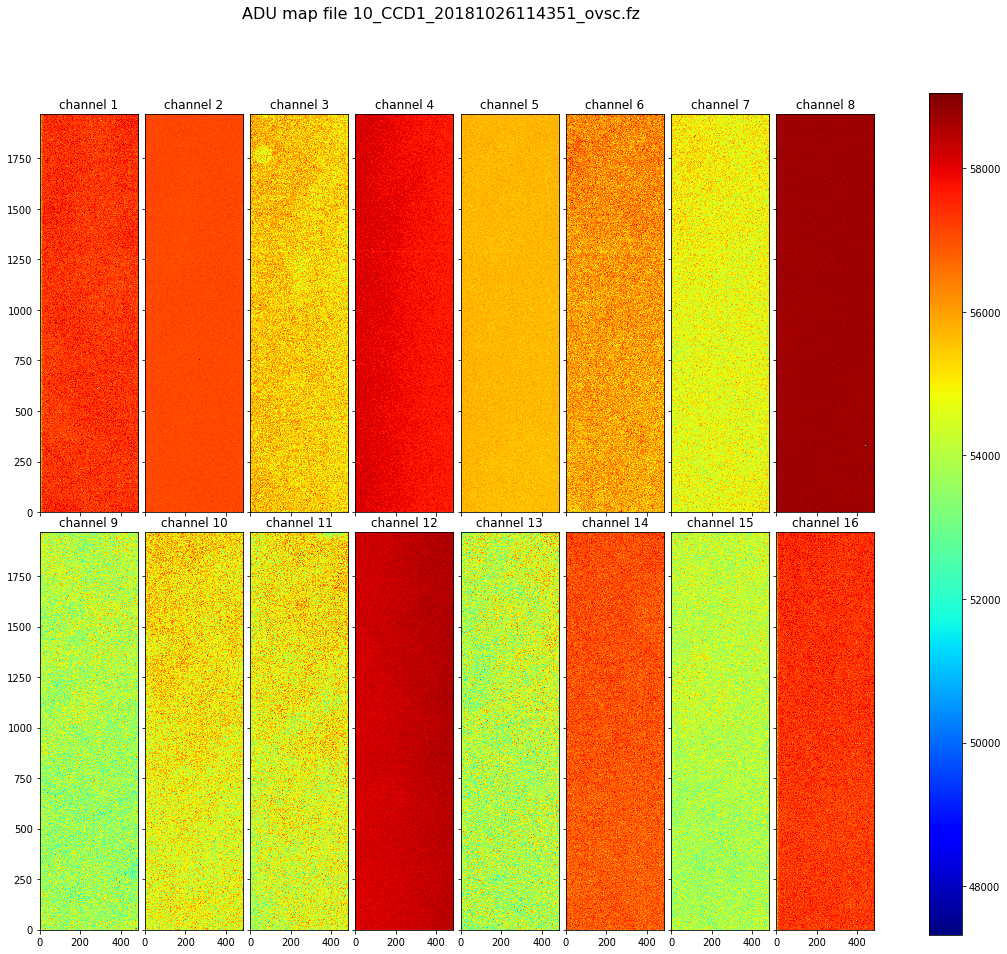

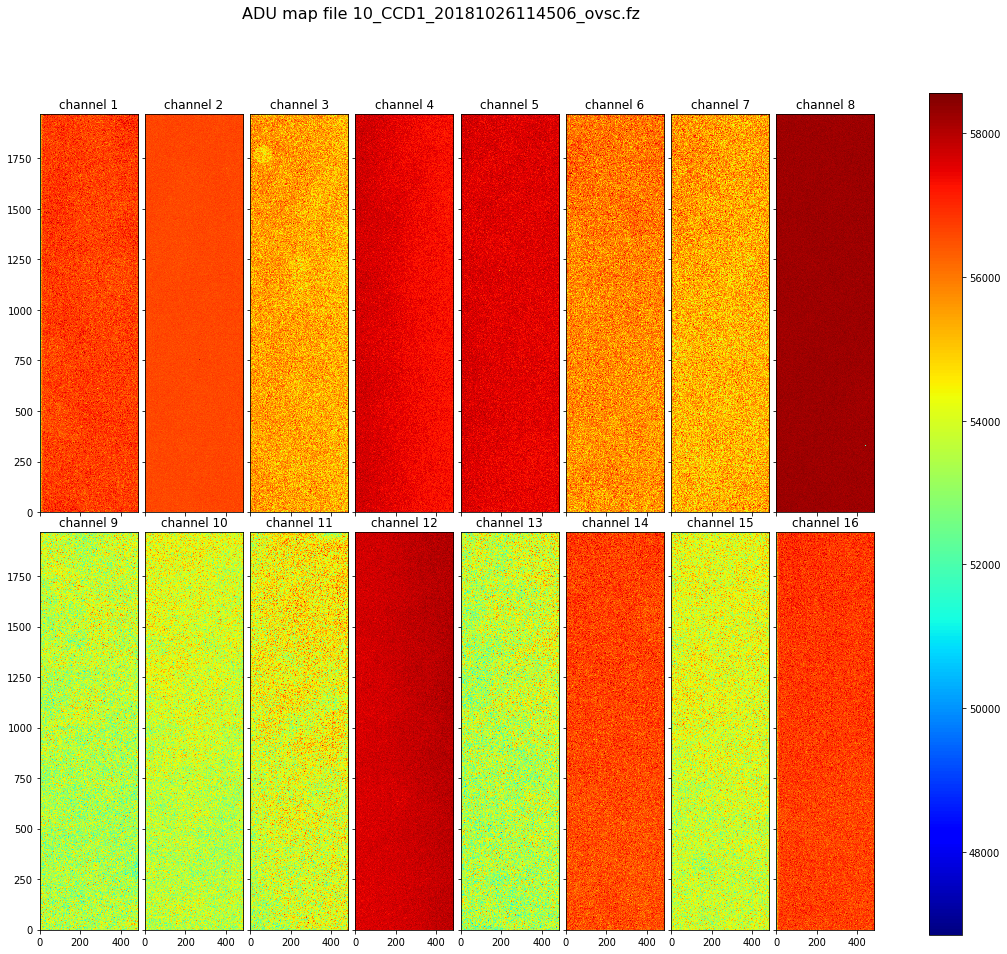

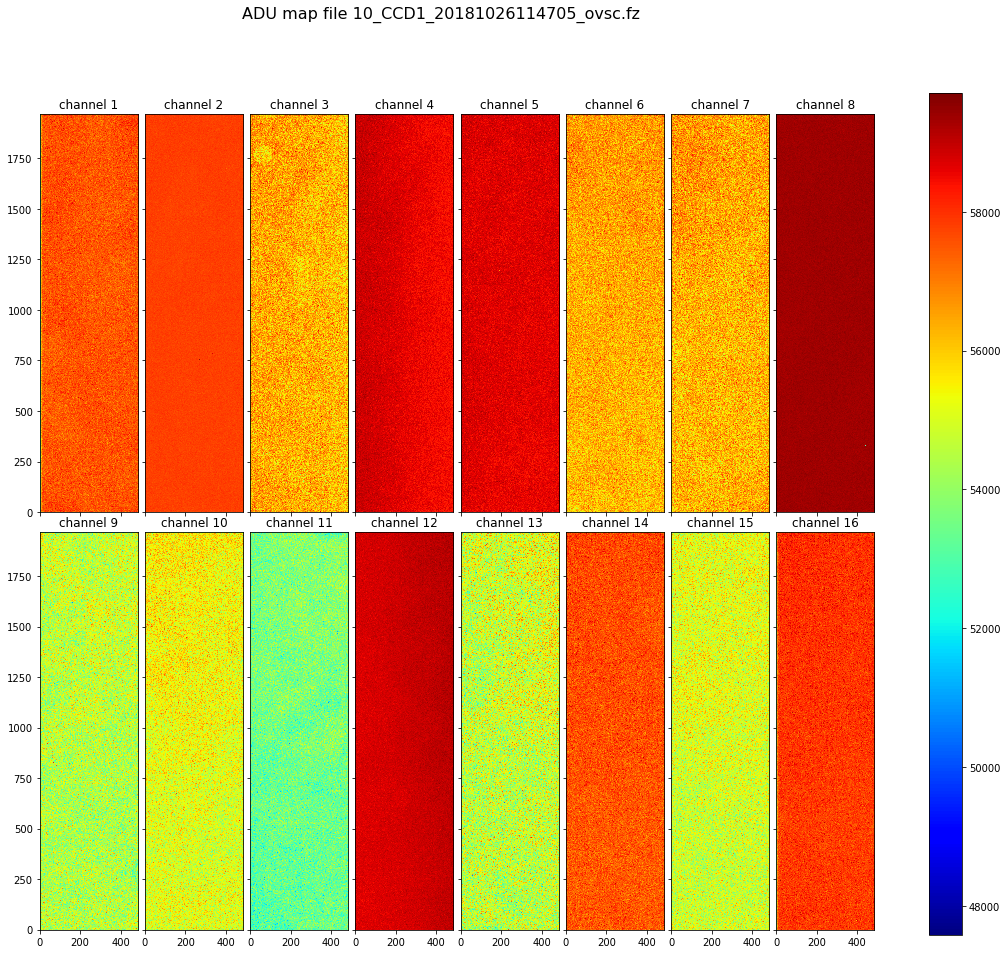

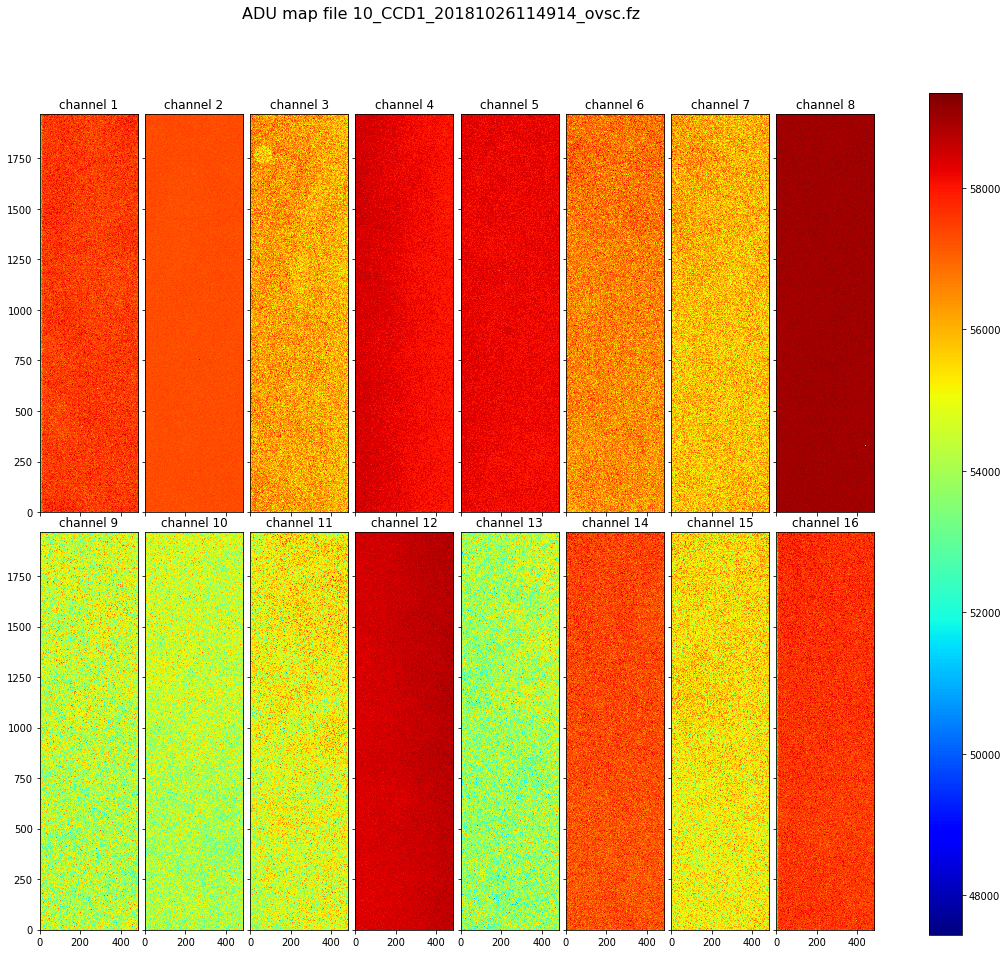

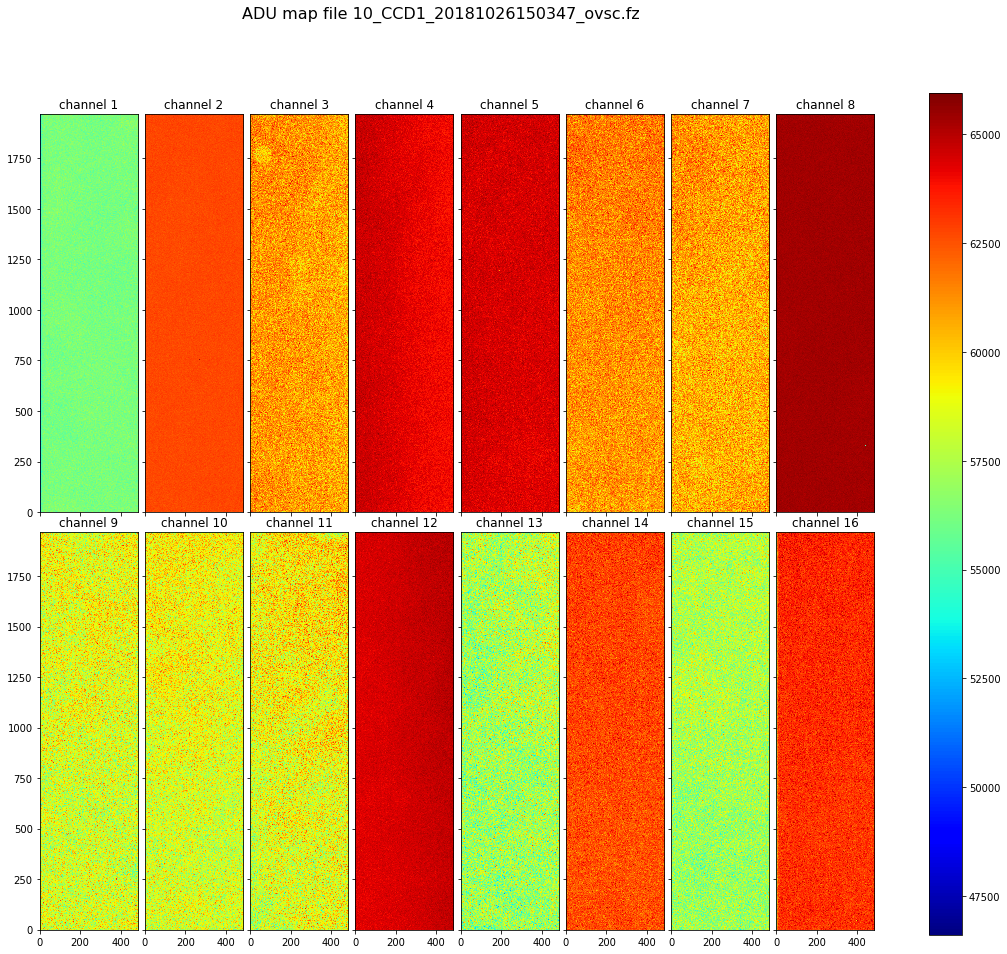

In [33]:
for filename in only_image_files:
    ShowImagesSet(mypath,filename)

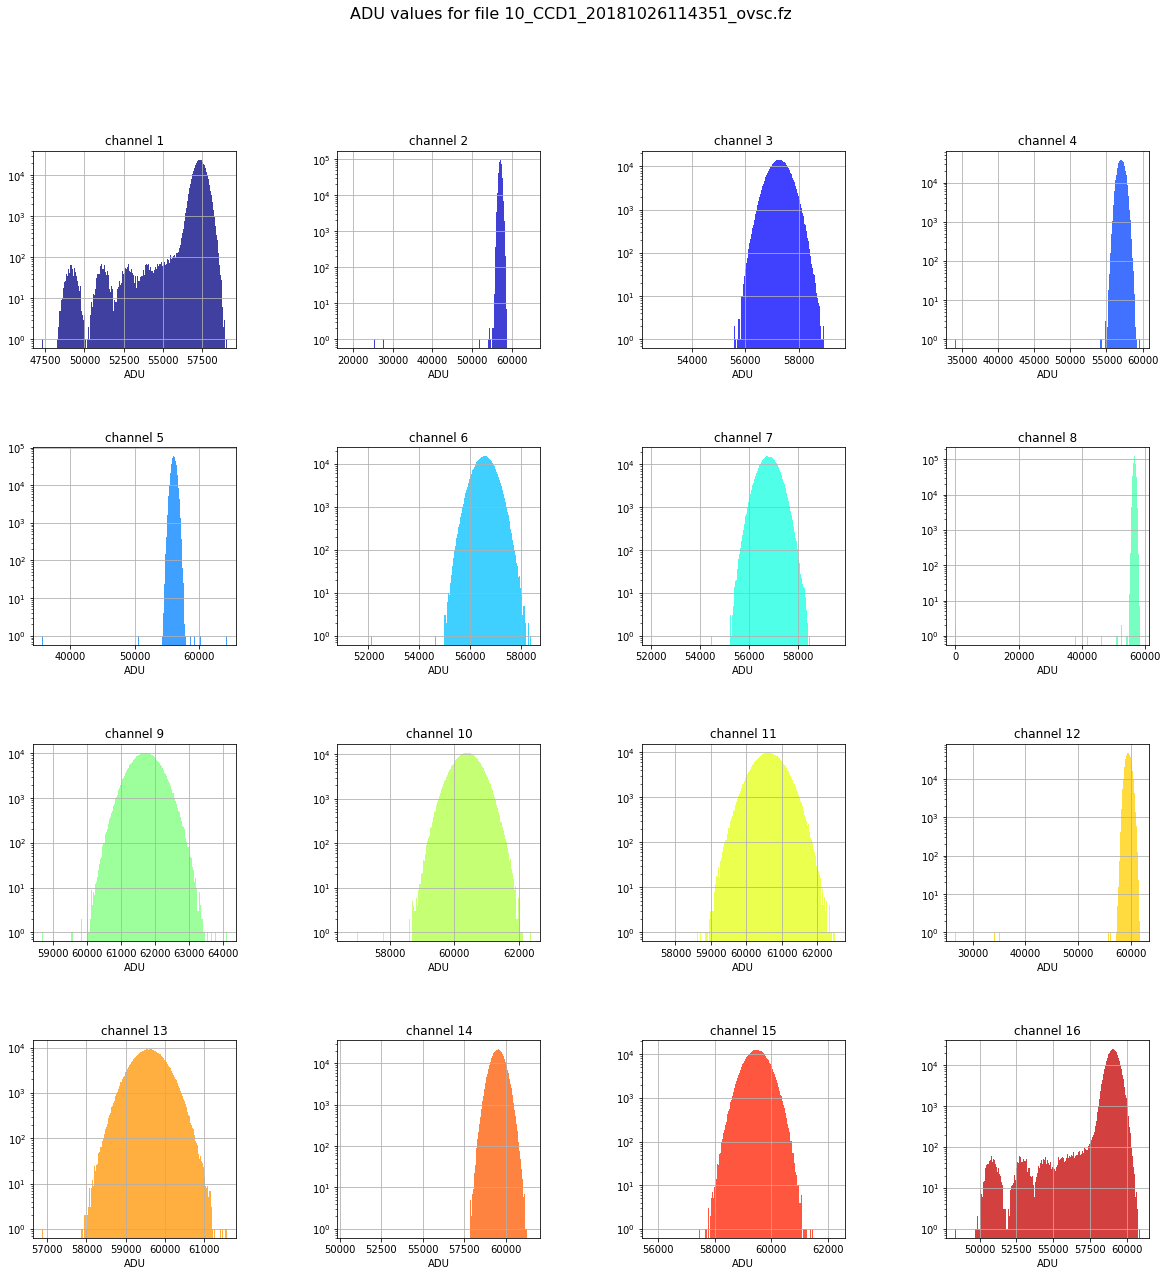

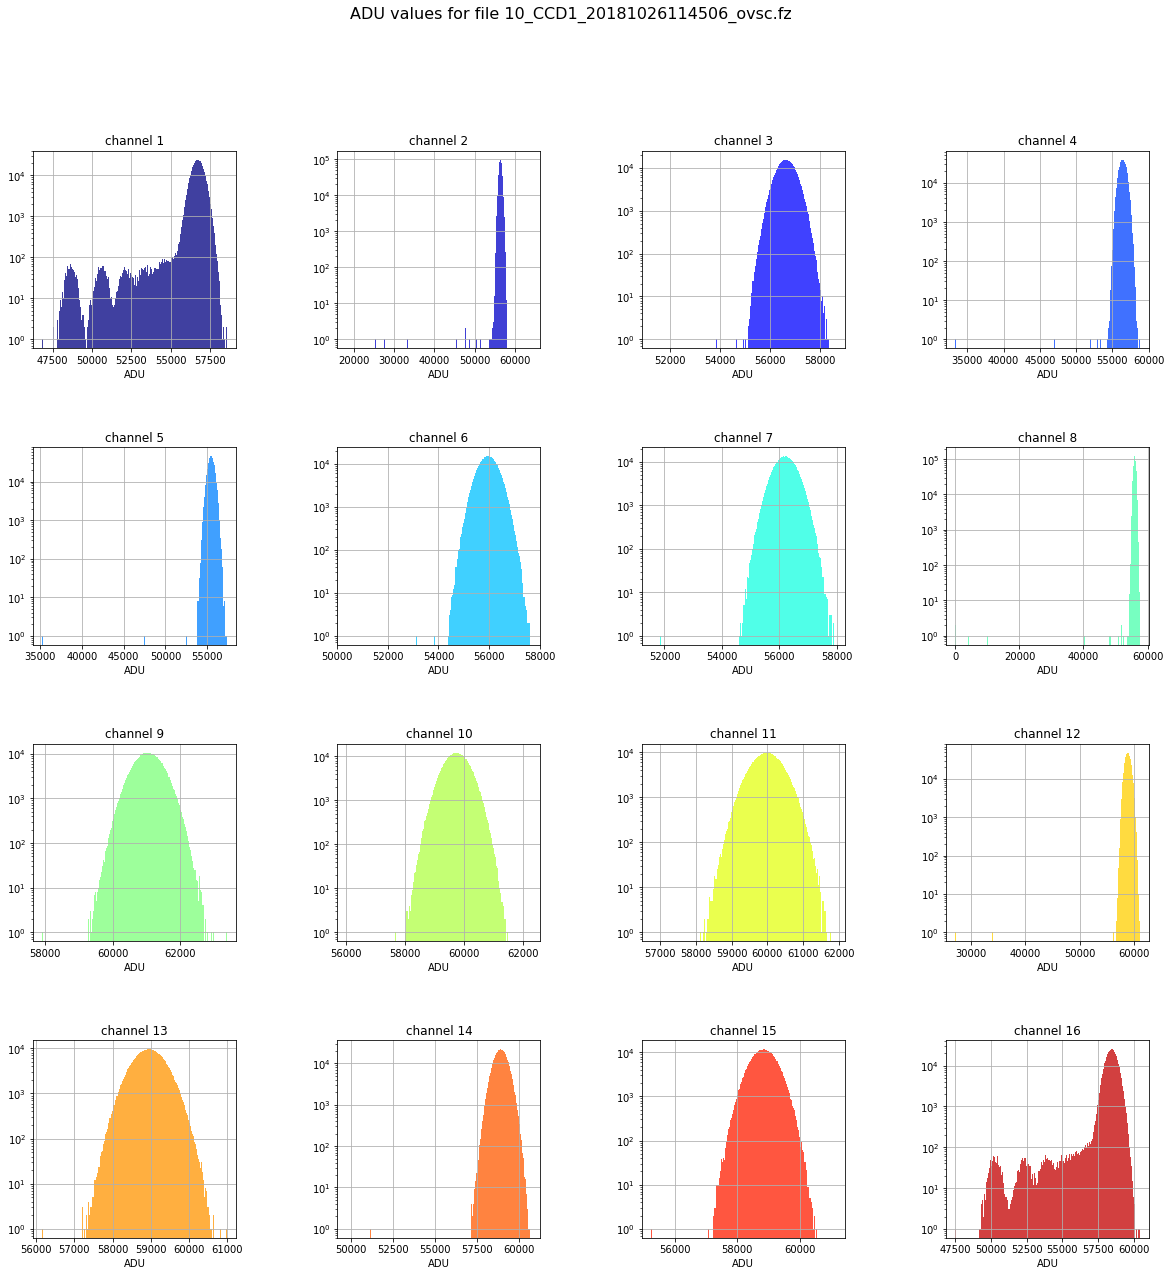

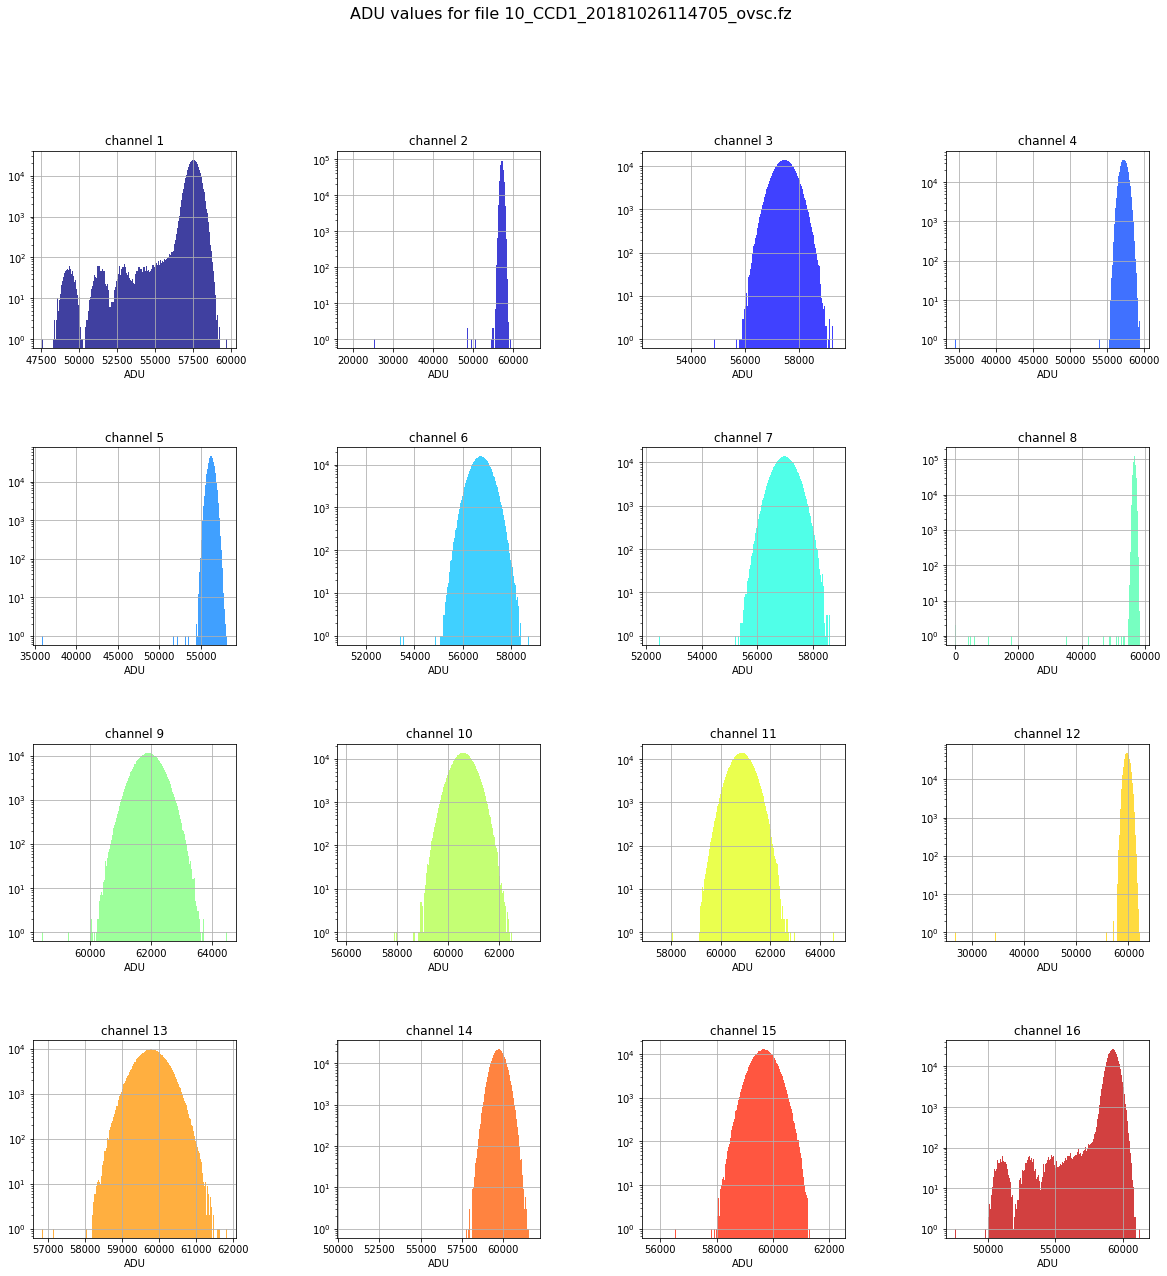

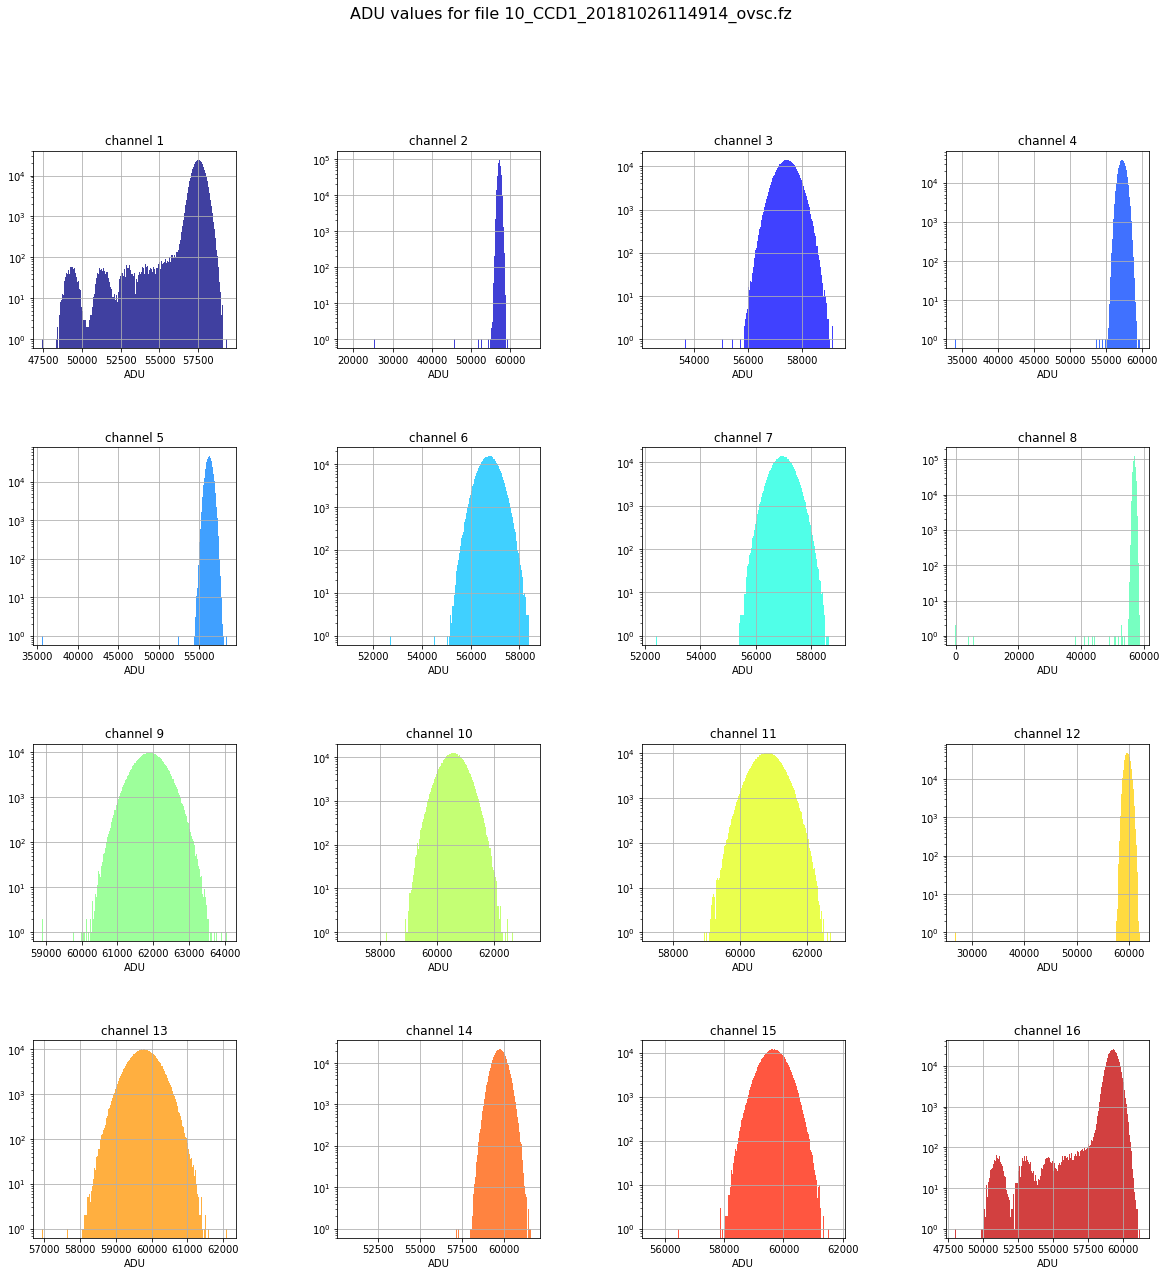

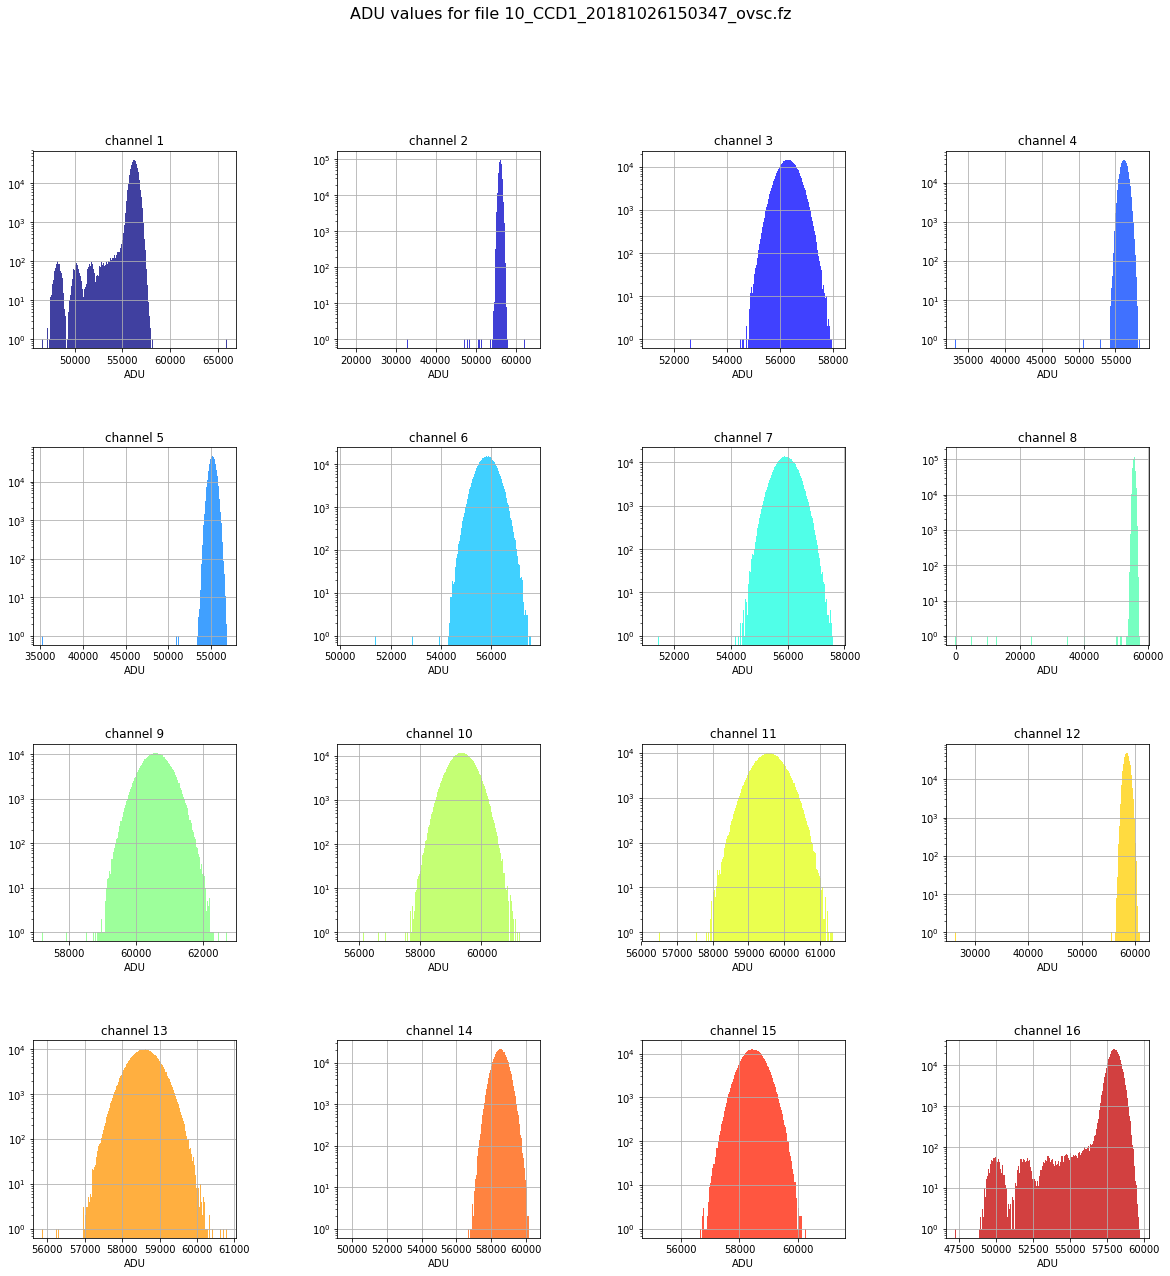

In [34]:
for filename in only_image_files:
    ShowHistoSet(mypath,filename)